## Готовим данные

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('02_titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [5]:
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [6]:
df = df[~df['Age'].isnull()]

In [7]:
df.shape

(714, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [9]:
y = df['Survived']

In [10]:
df = df.drop(['Survived'], axis=1)

## А где же машинное обучение?

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(df, y)
predict = dtc.predict(df)

In [13]:
# Но как сравнить? Как понять хорошо мы отработали или не очень?

In [14]:
from sklearn.metrics import accuracy_score as accs

In [15]:
accs( y, predict )

1.0

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)

In [16]:
from sklearn.metrics import precision_score, recall_score

In [17]:
precision_score(y, predict)

1.0

In [18]:
recall_score(y, predict)

1.0

In [19]:
## Так ли хорошо работает модель?

In [20]:
from sklearn.cross_validation import train_test_split

d:\IDE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


![Image](http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png)

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.5405405405405406
recall 0.6060606060606061
accuracy 0.6186440677966102
f1 0.5714285714285714


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.6901408450704225
recall 0.494949494949495
accuracy 0.6949152542372882


In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict_proba(X_test)

In [27]:
predict

array([[0.7, 0.3],
       [0. , 1. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [1. , 0. ],
       [0.3, 0.7],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.3, 0.7],
       [0.1, 0.9],
       [1. , 0. ],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.4, 0.6],
       [1. , 0. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.5, 0.5],
       [1. , 0. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.2,

(-0.01, 1.01)

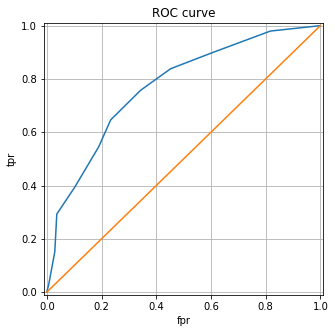

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [29]:
roc_auc_score(y_test, predict[:,1])

0.7704047777040477

![Image](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [30]:
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.61427426, 0.59262229, 0.59462711, 0.63472334, 0.67528736,
       0.74343186, 0.78981938, 0.75656814, 0.74466338, 0.82142857])

## Вернемся к данным

In [31]:
df = pd.read_csv('02_titanic_train.csv')

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [37]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [39]:
df.Age[df.Age.isnull()] = df.Age.mean()

d:\IDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [41]:
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    df,
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])